https://www.lfd.uci.edu/~gohlke/pythonlibs/xmshzit7/
pip3 install numpy-1.11.3+mkl-cp35-cp35m-win_amd64.whl
pip3 install scipy-0.19.0-cp35-cp35m-win_amd64.whl
pip3 install h5py
pip3 install --upgrade tensorflow
pip3 install keras

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from matplotlib import pyplot as plt


Using TensorFlow backend.


In [15]:
#Nacteni trenovacich a testovacich dat
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


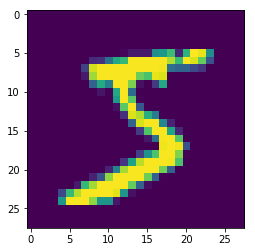

In [3]:
#Vykresleni prikladu trenovacich dat
plt.imshow(X_train[0])
plt.show()

In [16]:
#Potrebny reshape dat pred trenovanim (keras ocekava obrazek, tzv. trirozmerna dat)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
#Normalizace dat na hodnoty od 0 do 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [18]:
#Vytvoreni one-hot vektoru
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [21]:
#Vytvoreni sekvencniho modelu site
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

C:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  app.launch_new_instance()
C:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [22]:
#Kompilace modelu
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
#Trenovani modelu
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

C:\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\keras\models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 19s - loss: 0.2075 - acc: 0.9362    
Epoch 2/10
60000/60000 [==============================] - 16s - loss: 0.0887 - acc: 0.9728    
Epoch 3/10
60000/60000 [==============================] - 15s - loss: 0.0654 - acc: 0.9801    
Epoch 4/10
60000/60000 [==============================] - 15s - loss: 0.0552 - acc: 0.9829    
Epoch 5/10
60000/60000 [==============================] - 16s - loss: 0.0501 - acc: 0.9845    
Epoch 6/10
60000/60000 [==============================] - 17s - loss: 0.0422 - acc: 0.9874    
Epoch 7/10
60000/60000 [==============================] - 17s - loss: 0.0384 - acc: 0.9877    
Epoch 8/10
60000/60000 [==============================] - 16s - loss: 0.0332 - acc: 0.9899    
Epoch 9/10
60000/60000 [==============================] - 16s - loss: 0.0303 - acc: 0.9903    
Epoch 10/10
60000/60000 [==============================] - 17s - loss: 0.0303 - acc: 0.9903    


In [24]:
#Evaluace modelu
score = model.evaluate(X_test, Y_test, verbose=0)

In [26]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0334297043647
Test accuracy: 0.9901


In [28]:
#Jednotlive predikce modelu
predictions = model.predict(X_test)

In [32]:
print('First prediction:', np.argmax(predictions[0]))
print('Truth:', np.argmax(Y_test[0]))

First prediction: 7
Truth: 7
